In [1]:
# Import our dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats as st

In [2]:
# Import our csv file

file = "mba_decision_dataset.csv"
decision_df = pd.read_csv(file)
decision_df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [3]:
# Convert "Yes" to 1 and "No" to 0

decision_df['Has Management Experience'] = decision_df['Has Management Experience'].replace({'Yes': 1, 'No': 0})
decision_df['Decided to Pursue MBA?'] = decision_df['Decided to Pursue MBA?'].replace({'Yes': 1, 'No': 0})

In [4]:
# Remove the "Person ID" column

decision_df.drop(columns=['Person ID'], inplace = True)

decision_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,0,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,4,Analyst,53576,1,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,0
2,33,Female,Business,3.66,9,Engineer,79796,0,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,1,Manager,105956,0,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,9,Entrepreneur,96132,0,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,1


In [5]:
school_df = decision_df[["Age","Gender","Undergraduate Major","Undergraduate GPA","Current Job Title","GRE/GMAT Score","Undergrad University Ranking","MBA Funding Source","Reason for MBA", "Online vs. On-Campus MBA","Decided to Pursue MBA?"]]
school_df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
1,24,Male,Arts,3.03,Analyst,791,405,Loan,Career Growth,Online,0
2,33,Female,Business,3.66,Engineer,430,107,Scholarship,Skill Enhancement,Online,0
3,31,Male,Engineering,2.46,Manager,356,257,Loan,Entrepreneurship,On-Campus,0
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1


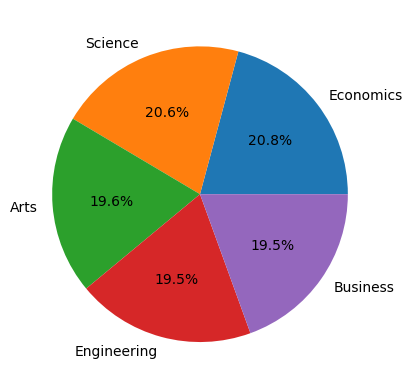

In [6]:
# Distribution of Undergraduate Major

undergraduate = school_df["Undergraduate Major"].value_counts()

labels = ["Economics", "Science", "Arts", "Engineering", "Business" ]

sizes = [undergraduate["Economics"], undergraduate["Science"], undergraduate["Arts"], undergraduate["Engineering"], undergraduate["Business"] ]
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.show()

In [7]:
undergraduate_1 = school_df.loc[school_df["Decided to Pursue MBA?"] == 1]
undergraduate_1

,Age,Gender,Undergraduate Major,Undergraduate GPA,Current Job Title,GRE/GMAT Score,Undergrad University Ranking,MBA Funding Source,Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,Entrepreneur,688,185,Loan,Entrepreneurship,On-Campus,1
4,28,Female,Business,2.75,Entrepreneur,472,338,Loan,Skill Enhancement,Online,1
7,27,Male,Engineering,2.80,Engineer,588,190,Loan,Entrepreneurship,On-Campus,1
8,30,Female,Arts,2.06,Entrepreneur,521,455,Scholarship,Career Growth,On-Campus,1
9,23,Female,Arts,3.51,Entrepreneur,671,411,Scholarship,Entrepreneurship,Online,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,25,Male,Arts,3.40,Entrepreneur,311,233,Employer,Skill Enhancement,Online,1
9994,23,Male,Business,3.28,Entrepreneur,256,190,Self-funded,Networking,Online,1
9995,33,Female,Economics,3.55,Analyst,524,100,Loan,Networking,Online,1
9997,31,Female,Economics,2.86,Manager,681,308,Loan,Networking,On-Campus,1


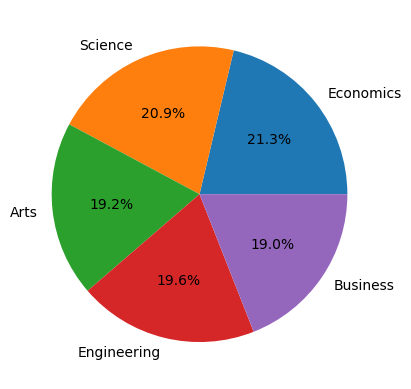

In [8]:
# Distribution of Undergraduate Major (Only "Yes")

undergraduate_2 = undergraduate_1["Undergraduate Major"].value_counts()

labels = ["Economics", "Science", "Arts", "Engineering", "Business" ]

sizes = [undergraduate_2["Economics"], undergraduate_2["Science"], undergraduate_2["Arts"], undergraduate_2["Engineering"], undergraduate_2["Business"] ]
plt.pie(sizes, labels = labels, autopct="%1.1f%%")
plt.show()